![rmotr](https://i.imgur.com/jiPp4hj.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/39117599-a2ca6a88-46e7-11e8-9eb1-e3321aec3f49.png"
    style="width:300px; float: right; margin: 0 40px 40px 40px;"></img>

# More Visualizations

Previously, we saw an overview of how pandas `plot` method worked and how to use the basic API of matplotlib. We'll provide more details in this lesson.

![separator2](https://i.imgur.com/4gX5WFr.png)

## Hands on!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Global API

Matplotlib's default pyplot API has a global, MATLAB-style interface, as we've already seen:

In [2]:
x = np.arange(-10, 11)

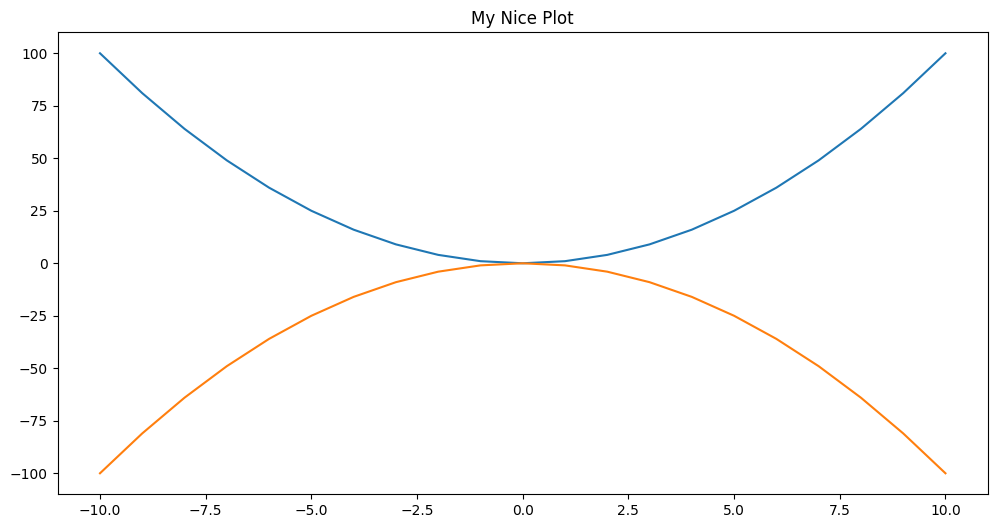

In [3]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))


<ipython-input-4-43428853b8a3>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)  # rows, columns, panel selected


Text(0, 0.5, 'X Squared')

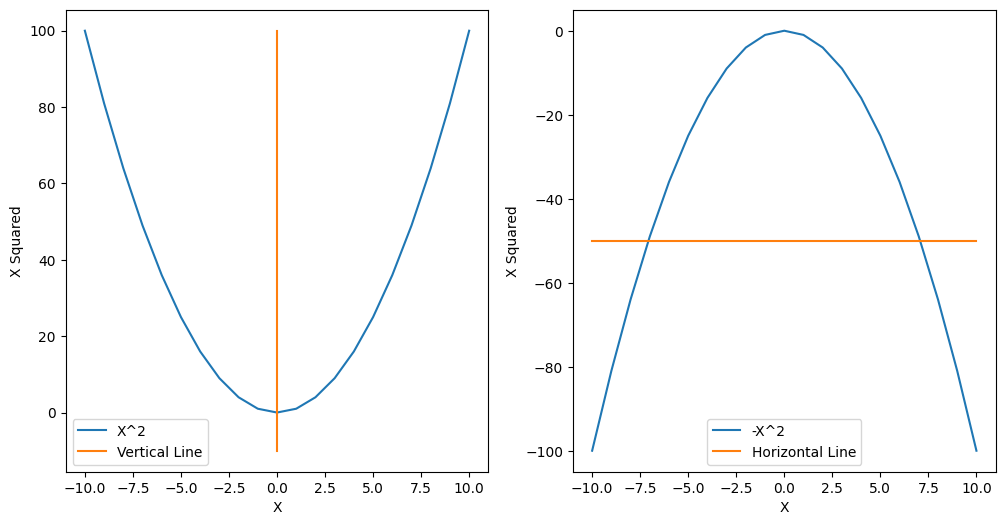

In [4]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

### OOP Interface

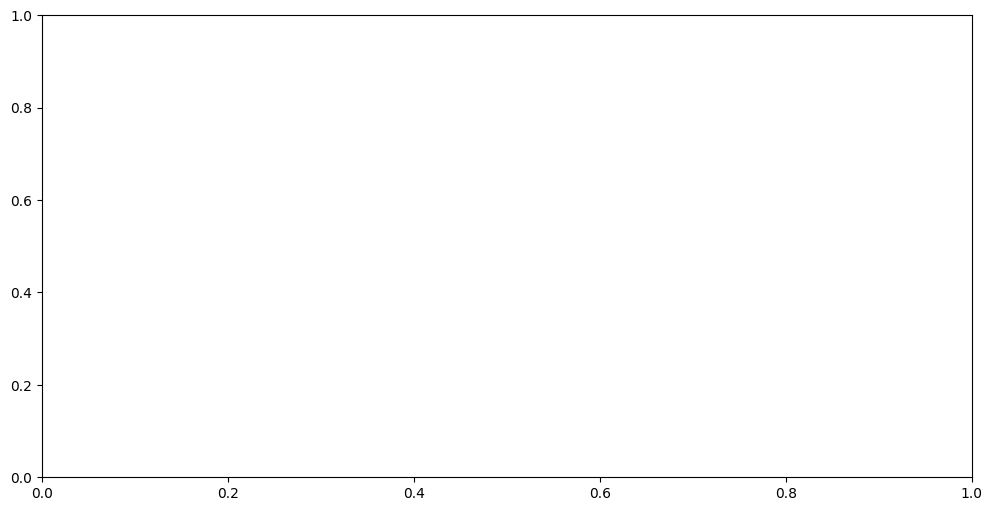

In [5]:
fig, axes = plt.subplots(figsize=(12, 6))

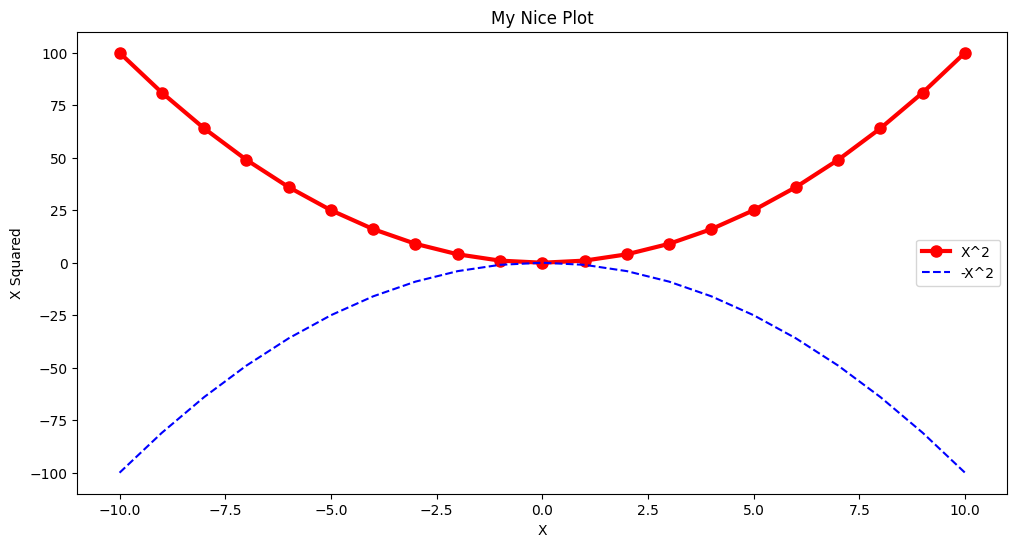

In [6]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

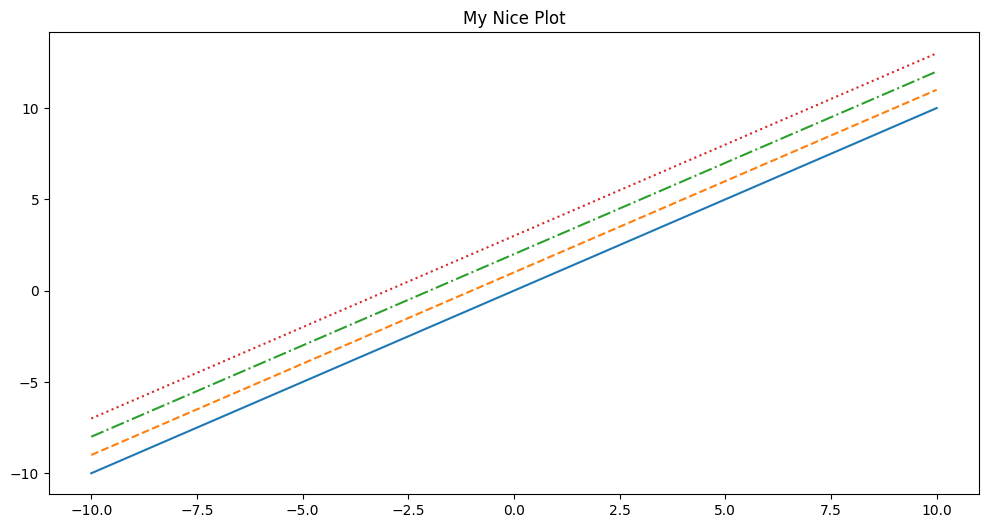

In [7]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

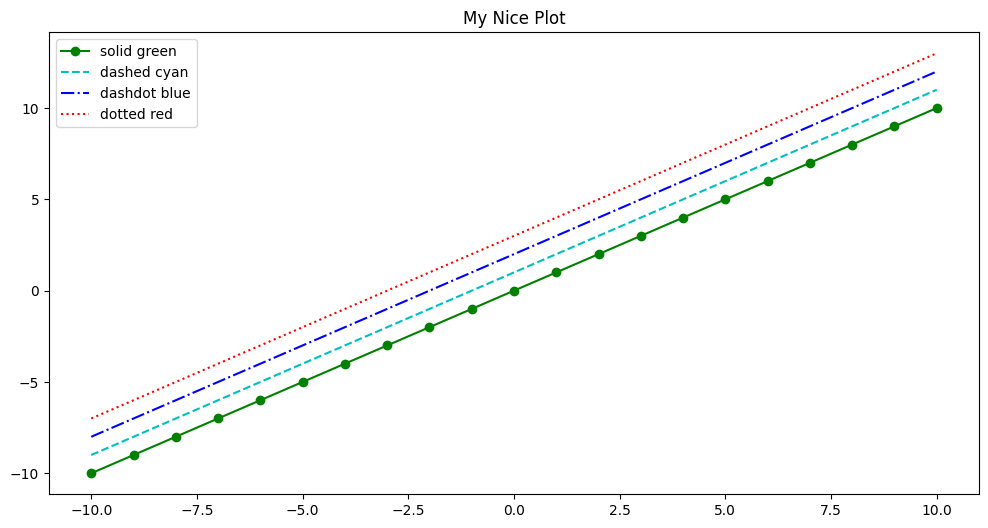

In [8]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [ ]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

In [ ]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

![separator1](https://i.imgur.com/ZUWYTii.png)

## Other types of plots

### Figures and subfigures

When we call the `subplots()` function we get a tuple containing a `Figure` and a `axes` element.

In [ ]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the `nrows` and `ncols` params.

(<Figure size 1400x600 with 4 Axes>,
 array([[<Axes: >, <Axes: >],
        [<Axes: >, <Axes: >]], dtype=object))

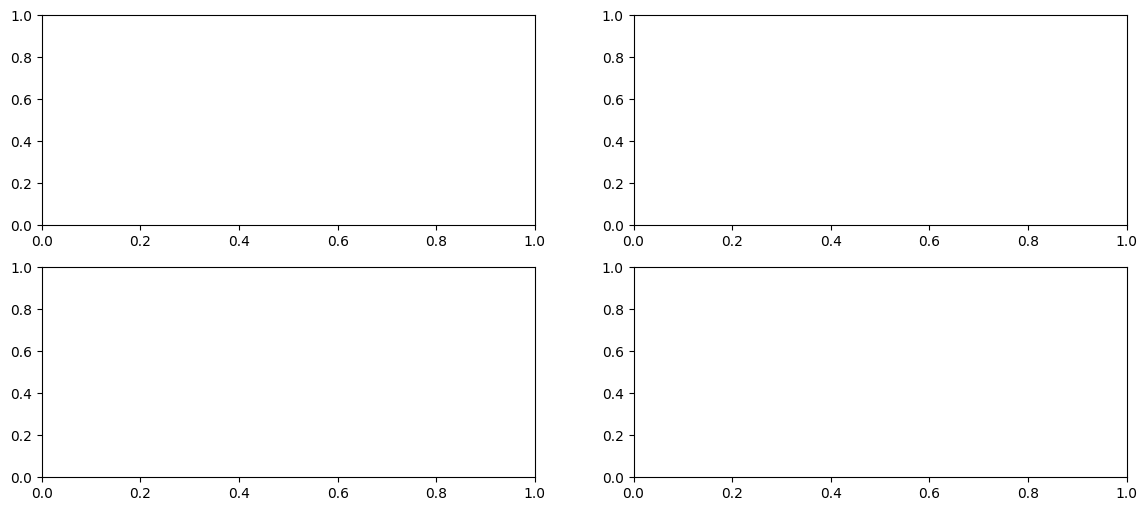

In [9]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

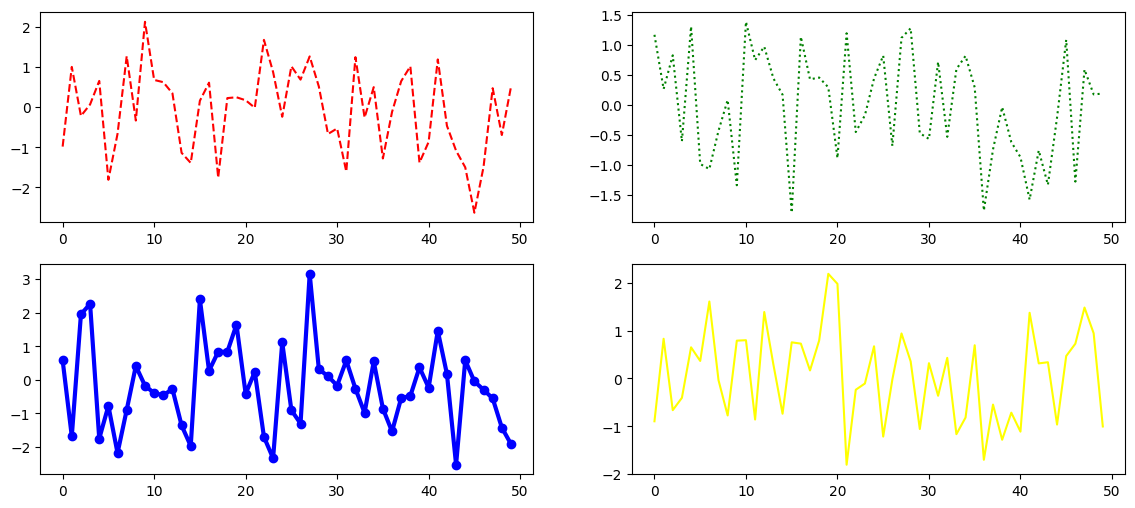

In [10]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

#### The `subplot2grid` command

There is another way to make subplots using a grid-like format:

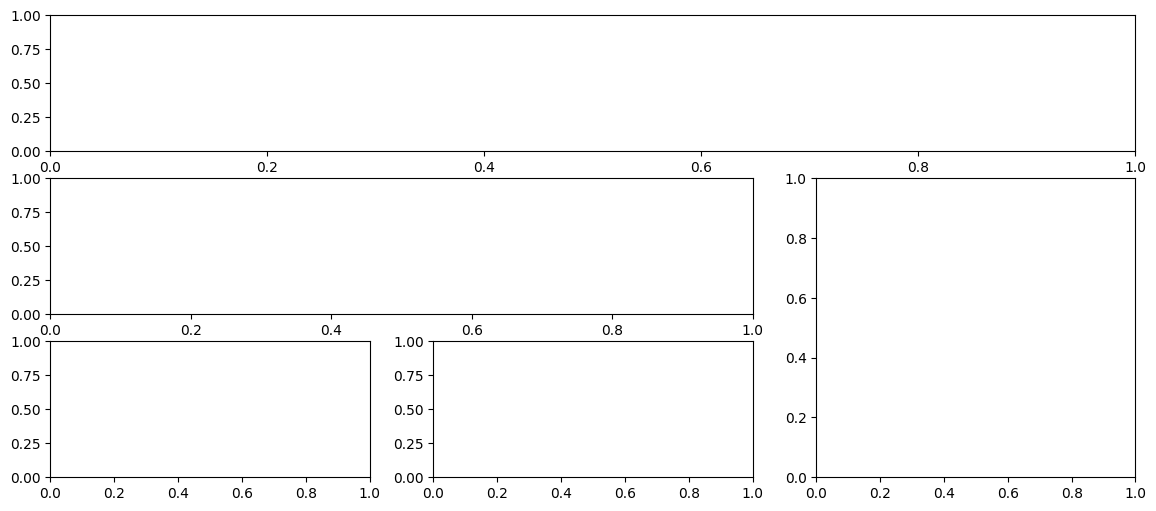

In [11]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

### Scatter Plot

In [12]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

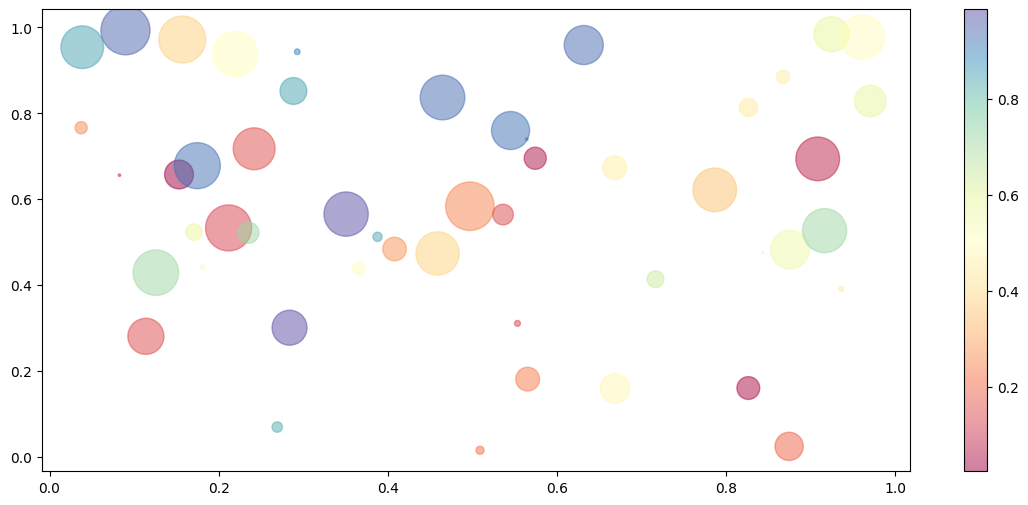

In [13]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

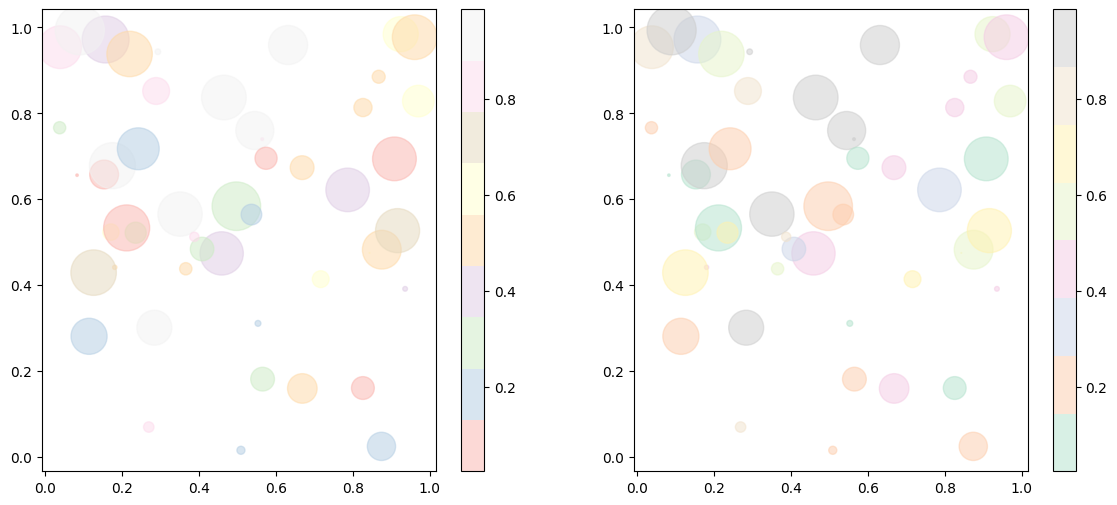

In [14]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

Here is the full `cmap` options available: https://matplotlib.org/users/colormaps.html

### Histograms

In [15]:
values = np.random.randn(1000)

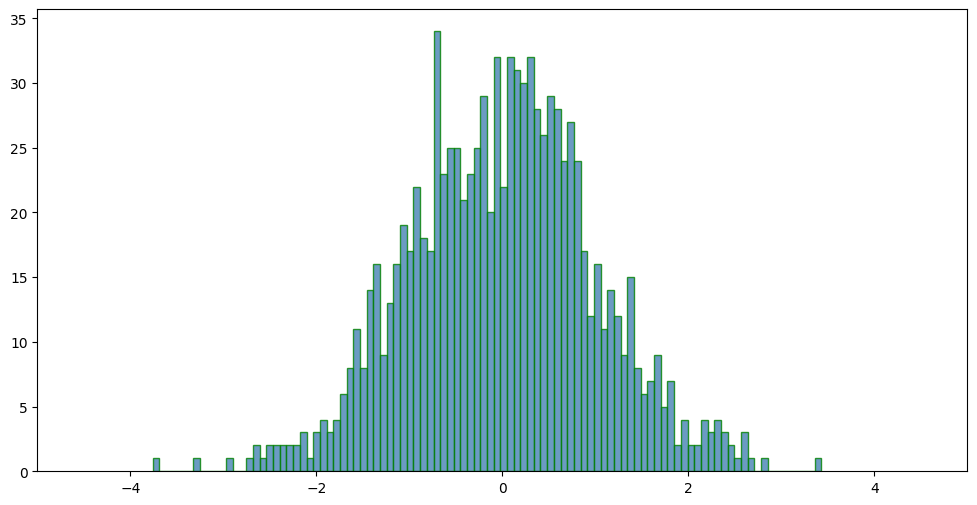

In [16]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [17]:
fig.savefig('hist.png')

### KDE (kernel density estimation)

In [18]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

<ipython-input-18-67a840a934bd>:3: DeprecationWarning: Please use `gaussian_kde` from the `scipy.stats` namespace, the `scipy.stats.kde` namespace is deprecated.
  density = stats.kde.gaussian_kde(values)


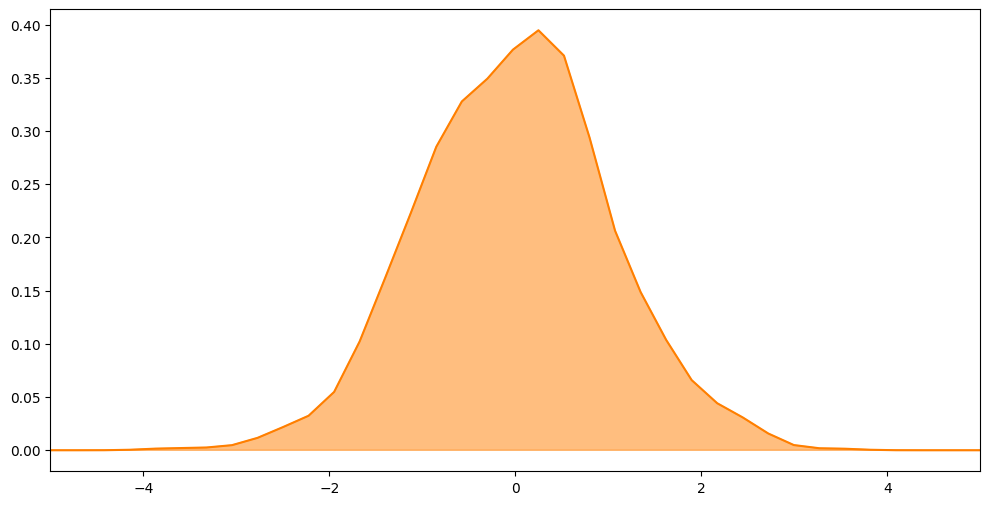

In [19]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Combine plots

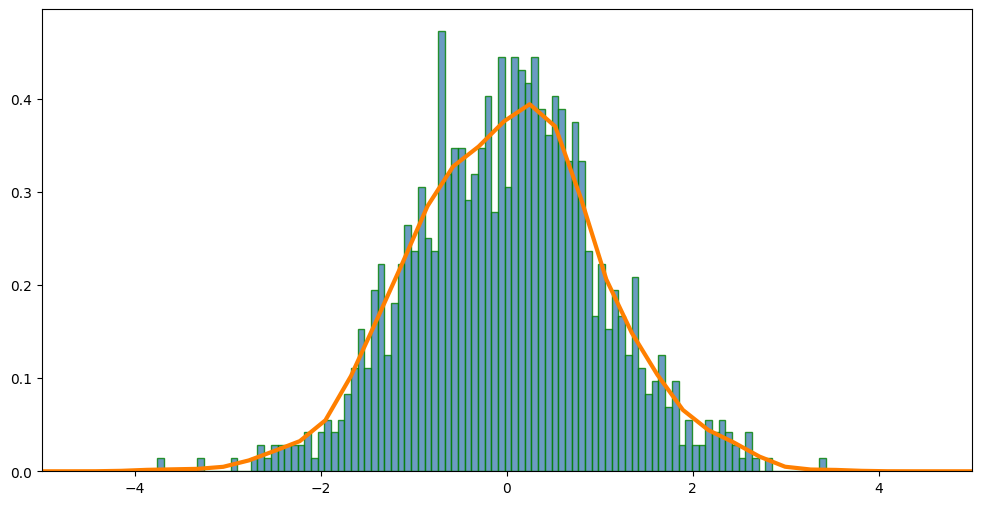

In [20]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

### Bar plots

In [21]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

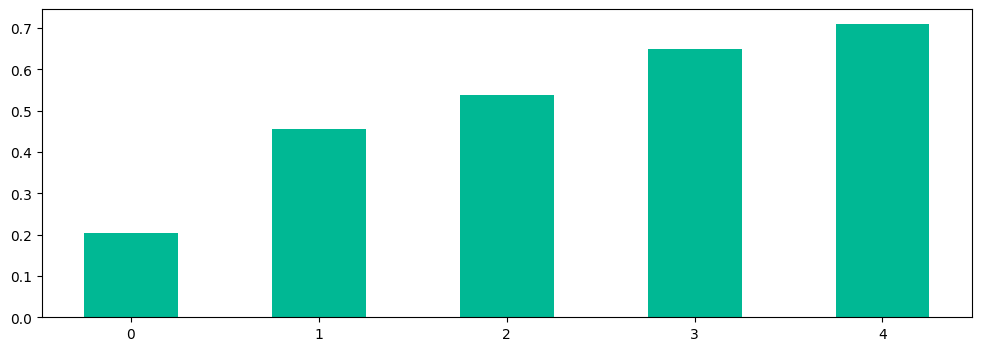

In [22]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and add a legend to the plot:

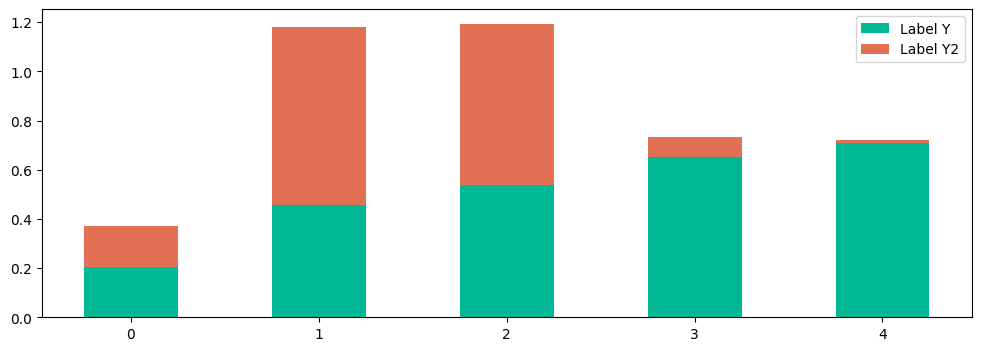

In [23]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

### Boxplots and outlier detection

In [24]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 1., 9., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <BarContainer object of 10 artists>)

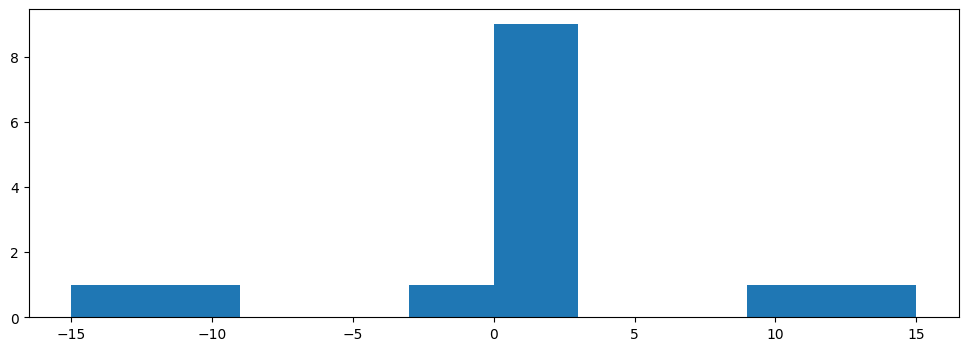

In [25]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7a9dce18e3b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a9dce18fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a9dce18dba0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a9dce18da50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a9dce18d1b0>],
 'means': []}

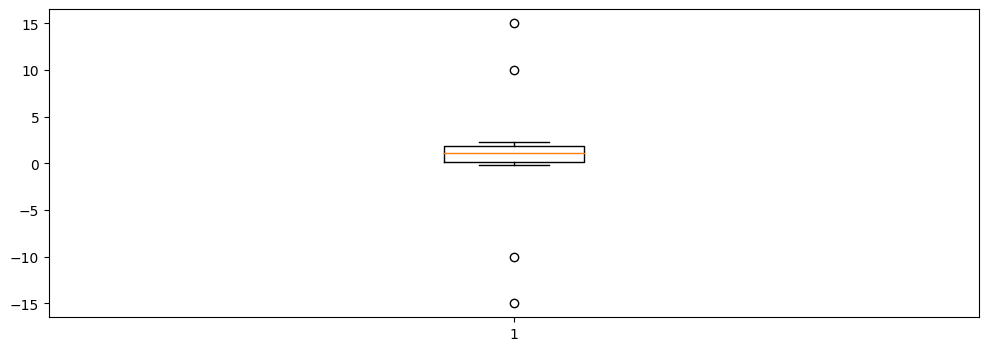

In [26]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

![separator2](https://i.imgur.com/4gX5WFr.png)